In [9]:
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("data.csv" , sep = "," , encoding = "latin1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Show columns with missing values and their percentage

In [14]:
missing = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
print("Missing Values Count:\n", missing)
print("\nMissing Values Percentage (%):\n", missing_percent)

Missing Values Count:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing Values Percentage (%):
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


# Check for Duplicates

In [15]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 5268


# Display Unique Values for Each Column

In [16]:
for col in df.columns:
    print(f"{col} - Unique values: {df[col].nunique()}")

InvoiceNo - Unique values: 25900
StockCode - Unique values: 4070
Description - Unique values: 4223
Quantity - Unique values: 722
InvoiceDate - Unique values: 23260
UnitPrice - Unique values: 1630
CustomerID - Unique values: 4372
Country - Unique values: 38


## Calculate Revenue

In [17]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# 1) Data Wrangling (Clean dataset)

## handle missing values

In [19]:
df['Description'] = df['Description'].fillna("Unknown")  
df['CustomerID'] = df['CustomerID'].fillna(-1)           

missing_after = df.isnull().sum()
missing_percent_after = df.isnull().mean() * 100
print("Missing Values Count After Cleaning:\n", missing_after)
print("\nMissing Values Percentage After Cleaning (%):\n", missing_percent_after)

Missing Values Count After Cleaning:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

Missing Values Percentage After Cleaning (%):
 InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
Revenue        0.0
dtype: float64


In [20]:
df["CustomerID"] = df["CustomerID"].astype("object")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   Revenue      541909 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


## Remove Duplicates

In [22]:
print("Number of duplicates before removal:", df.duplicated().sum())

df = df.drop_duplicates()

print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates before removal: 5268
Number of duplicates after removal: 0


## Number Of outliers

In [23]:
num_cols = df.select_dtypes(include='number').columns
outliers_dict = {}

for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    
    outliers_dict[c] = df[(df[c] < low) | (df[c] > high)]
    
    print(f"\nOutliers in {c}: {outliers_dict[c].shape[0]}")


Outliers in Quantity: 58501

Outliers in UnitPrice: 39450

Outliers in Revenue: 45626


## Detect and Handle Outliers Quantity column

In [24]:
print("Quantity Summary:")
df['Quantity'].describe()

Quantity Summary:


count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [25]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

quantity_outliers = df[(df['Quantity'] < low) | (df['Quantity'] > high)]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Low bound:", low)
print("High bound:", high)
print("Quantity Outliers Count:", quantity_outliers.shape[0])
quantity_outliers.head()

Q1: 1.0
Q3: 10.0
IQR: 9.0
Low bound: -12.5
High bound: 23.5
Quantity Outliers Count: 58501


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,90.00
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,15.60
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France,40.80


## Create (IsReturn) Column 

In [26]:
df['IsReturn'] = df['Quantity'] < 0

## Extract the negative values into a separate DataFrame

In [27]:
returns_df = df[df['IsReturn'] == True].copy()

## Remove the negative values from the main dataset.

In [28]:
df = df[df['Quantity'] >= 0].copy()

In [29]:
returns_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,True


In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False


In [31]:
print("Quantity Summary:")

df['Quantity'].describe()

Quantity Summary:


count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

## Apply the IQR method only to the positive quantities

In [32]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

positive_outliers = df[df['Quantity'] > high]
print("Outliers Count:", positive_outliers.shape[0])
positive_outliers.head()

Outliers Count: 27355


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08,False
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France,40.80,False
44,536370,22492,MINI PAINT SET VINTAGE,36,12/1/2010 8:45,0.65,12583.0,France,23.40,False
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,204.00,False
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.40,False


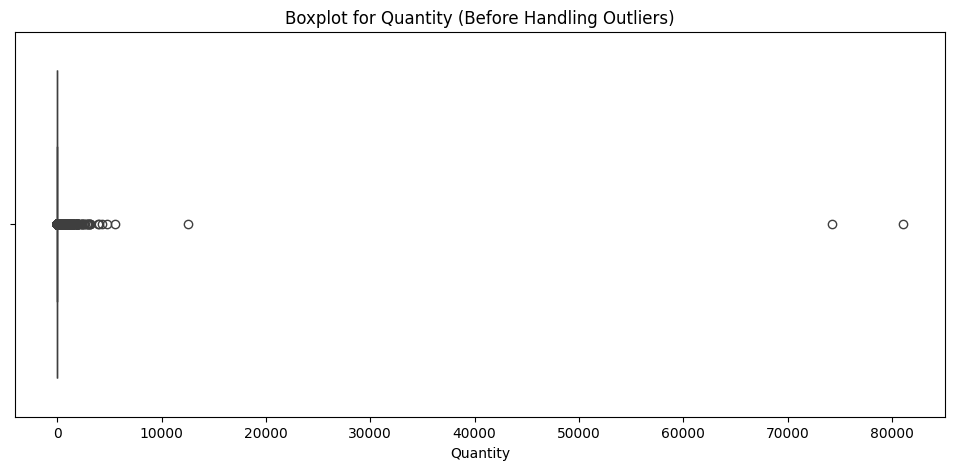

In [33]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot for Quantity (Before Handling Outliers)")
plt.xlabel("Quantity")
plt.show()

## What should we do with large positive outliers?

In [34]:
df['Quantity'] = df['Quantity'].clip(lower=low, upper=high)

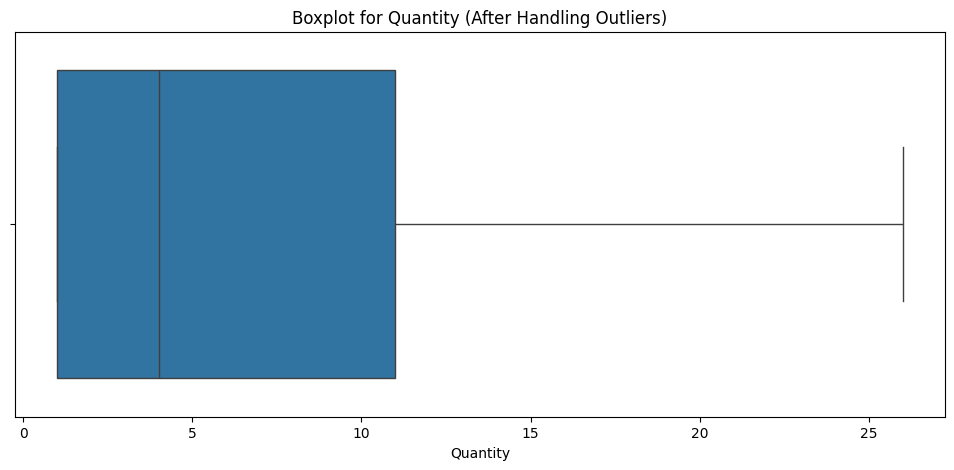

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot for Quantity (After Handling Outliers)")
plt.xlabel("Quantity")
plt.show()


In [36]:
print("Quantity Summary:")

df['Quantity'].describe()

Quantity Summary:


count    526054.00000
mean          6.92734
std           7.57355
min           1.00000
25%           1.00000
50%           4.00000
75%          11.00000
max          26.00000
Name: Quantity, dtype: float64

## The correct approach for handling outliers in UnitPrice

###  First, detect the outliers

In [37]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

unitprice_outliers = df[(df['UnitPrice'] < low) | (df['UnitPrice'] > high)]
print("Outliers in UnitPrice:", unitprice_outliers.shape[0])
unitprice_outliers.head()


Outliers in UnitPrice: 37829


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom,19.9,False
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,54.0,False
65,536374,21258,VICTORIAN SEWING BOX LARGE,26,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.4,False
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom,29.9,False
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom,29.9,False


## Prices equal to zero → removed because they are invalid

In [38]:
df = df[df['UnitPrice'] > 0]

## Very small prices (less than 0.1) → likely incorrect → removed

In [39]:
df = df[df['UnitPrice'] >= 0.1]

## Extremely high prices (outliers above the IQR threshold) → removed

In [40]:
df = df[(df['UnitPrice'] >= low) & (df['UnitPrice'] <= high)]

In [41]:
print("UnitPrice Summary:")
df['UnitPrice'].describe()

UnitPrice Summary:


count    486804.000000
mean          2.537362
std           1.915989
min           0.100000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.330000
Name: UnitPrice, dtype: float64

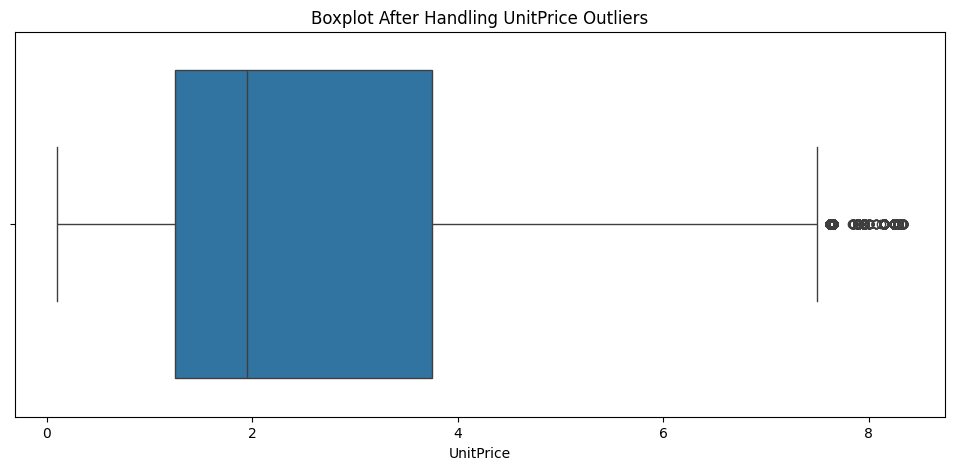

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot After Handling UnitPrice Outliers")
plt.show()

## The correct approach for handling outliers in Revenue

In [43]:
print("Revenue Summary:")
df['Revenue'].describe()

Revenue Summary:


count    486804.000000
mean         18.537816
std         272.964894
min           0.100000
25%           3.480000
50%           8.500000
75%          17.000000
max      168469.600000
Name: Revenue, dtype: float64

# Revenue must be recalculated after cleaning.

In [44]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

##  identifying the true outliers in the Revenue column

In [45]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

low = max(low, 0)

print("Low bound:", low)
print("High bound:", high)

revenue_outliers = df[(df['Revenue'] < low) | (df['Revenue'] > high)]
print("Outliers in Revenue:", revenue_outliers.shape[0])
revenue_outliers.head()


Low bound: 0
High bound: 36.279999999999994
Outliers in Revenue: 29171


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,26,12/1/2010 8:34,1.69,13047.0,United Kingdom,43.94,False
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.00,False
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,90.00,False
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,45.00,False
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583.0,France,53.10,False


## Clip (adjust the values instead of deleting them)

In [46]:
df['Revenue'] = df['Revenue'].clip(lower=low, upper=high)

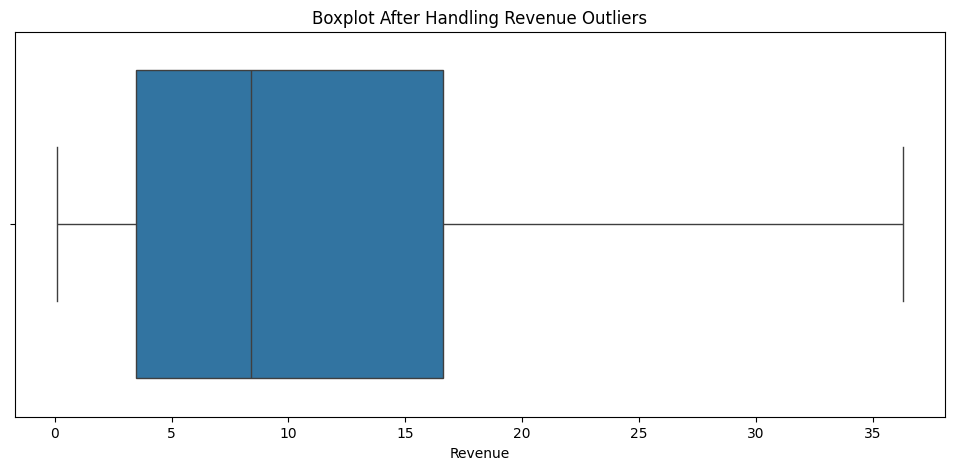

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Revenue'])
plt.title("Boxplot After Handling Revenue Outliers")
plt.show()

## After handling outliers

In [48]:
num_cols = df.select_dtypes(include='number').columns
outliers_dict = {}

for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    
    outliers_dict[c] = df[(df[c] < low) | (df[c] > high)]
    
    print(f"\nOutliers in {c}: {outliers_dict[c].shape[0]}")



Outliers in Quantity: 0

Outliers in UnitPrice: 17141

Outliers in Revenue: 0


# inconsistent formats

#### Unifying the date format

In [49]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

#### Converting columns from string to numeric type.

In [50]:
numeric_cols = ['Quantity', 'UnitPrice', 'Revenue', 'CustomerID']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### Removing invalid characters in prices

In [51]:
df['UnitPrice'] = (
    df['UnitPrice']
    .astype(str)
    .str.replace('[^0-9\.]', '', regex=True)
).astype(float)


In [52]:
df.head(500)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
532,536409,22197,SMALL POPCORN HOLDER,2,2010-12-01 11:45:00,0.85,17908.0,United Kingdom,1.70,False
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,2010-12-01 11:45:00,1.95,17908.0,United Kingdom,3.90,False
534,536409,85099F,JUMBO BAG STRAWBERRY,1,2010-12-01 11:45:00,1.95,17908.0,United Kingdom,1.95,False
535,536409,20717,STRAWBERRY SHOPPER BAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,False


## Final number of columns and rows.

In [53]:
df.shape
#541909 rows × 8 columns

(486804, 10)

# 2) Exploratory Data Analysis (EDA)

## 1) Univariate Analysis


===== Quantity Summary =====
count    486804.000000
mean          7.265103
std           7.679763
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max          26.000000
Name: Quantity, dtype: float64


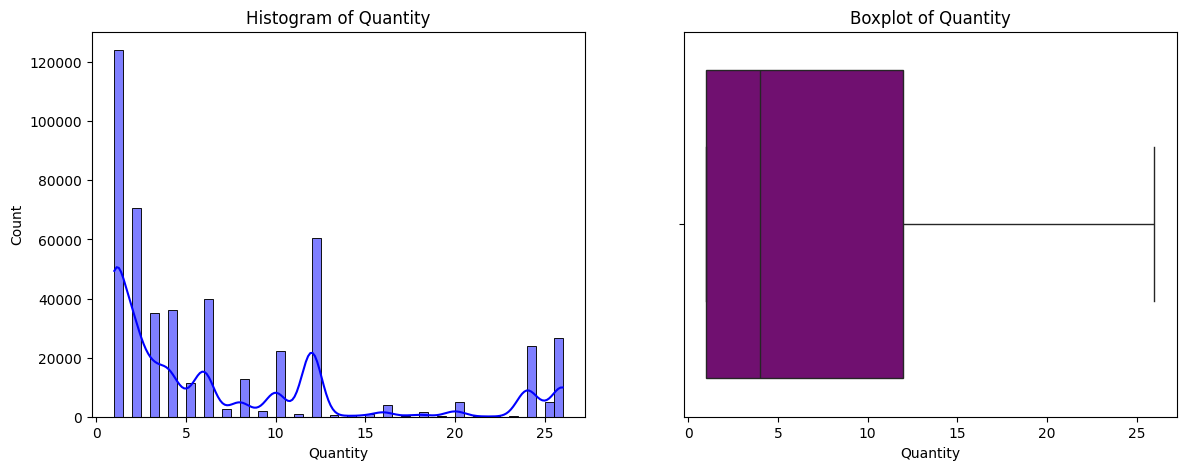


===== UnitPrice Summary =====
count    486804.000000
mean          2.537362
std           1.915989
min           0.100000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.330000
Name: UnitPrice, dtype: float64


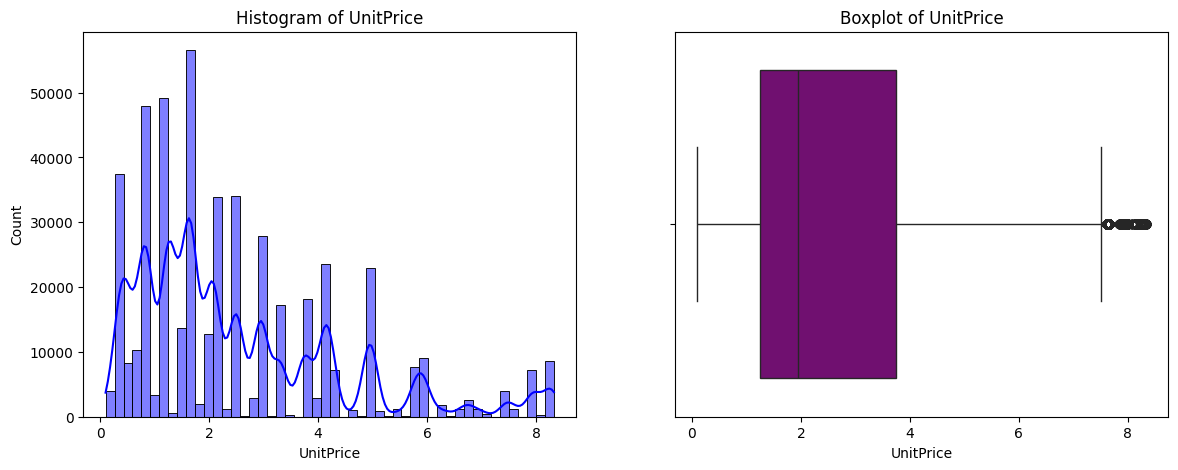


===== Revenue Summary =====
count    486804.000000
mean         11.637531
std          10.019189
min           0.100000
25%           3.480000
50%           8.400000
75%          16.600000
max          36.280000
Name: Revenue, dtype: float64


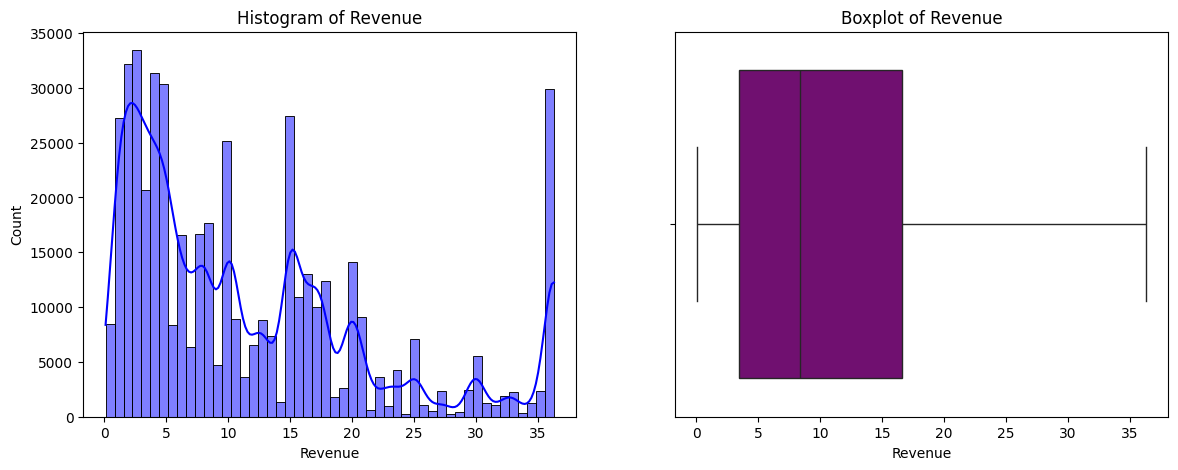

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Quantity', 'UnitPrice', 'Revenue']

for col in cols:
    print(f"\n===== {col} Summary =====")
    print(df[col].describe())

    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=50, color='blue')
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='purple')
    plt.title(f"Boxplot of {col}")

    plt.show()

### Top & Bottom Values

#### Maximum Revenue

In [55]:
df.nlargest(10, 'Revenue')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,26,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,36.28,False
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,36.28,False
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,36.28,False
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,36.28,False
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France,36.28,False
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0,France,36.28,False
35,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0,France,36.28,False
36,536370,22659,LUNCH BOX I LOVE LONDON,24,2010-12-01 08:45:00,1.95,12583.0,France,36.28,False
37,536370,22631,CIRCUS PARADE LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0,France,36.28,False
39,536370,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-01 08:45:00,1.65,12583.0,France,36.28,False


### Minimum Revenue

In [56]:
df.nsmallest(10, 'Revenue')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn
241349,558198,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-06-27 12:49:00,0.10,14104.0,United Kingdom,0.10,False
257038,559509,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-07-08 15:25:00,0.10,15920.0,United Kingdom,0.10,False
497822,578479,17038,PORCELAIN BUDAH INCENSE HOLDER,1,2011-11-24 12:48:00,0.10,15858.0,United Kingdom,0.10,False
143754,548711,47013A,WINE BOTTLE DRESSING LT.BLUE,1,2011-04-03 14:24:00,0.12,18116.0,United Kingdom,0.12,False
158518,550298,20668,DISCO BALL CHRISTMAS DECORATION,1,2011-04-15 16:11:00,0.12,17346.0,United Kingdom,0.12,False
164579,550651,21401,BLUE PUDDING SPOON,1,2011-04-19 16:52:00,0.12,15436.0,United Kingdom,0.12,False
257339,559525,21402,RED EGG SPOON,1,2011-07-10 10:30:00,0.12,16923.0,United Kingdom,0.12,False
267634,560359,16008,SMALL FOLDING SCISSOR(POINTED EDGE),1,2011-07-18 11:47:00,0.12,14159.0,United Kingdom,0.12,False
276196,561036,85204,HANGING WOOD AND FELT FLOWER,1,2011-07-24 11:54:00,0.12,13137.0,United Kingdom,0.12,False
310598,564191,85204,HANGING WOOD AND FELT FLOWER,1,2011-08-23 16:16:00,0.12,17315.0,United Kingdom,0.12,False


# 2) Multivariate Analysis

## Relationship between Quantity and Revenue

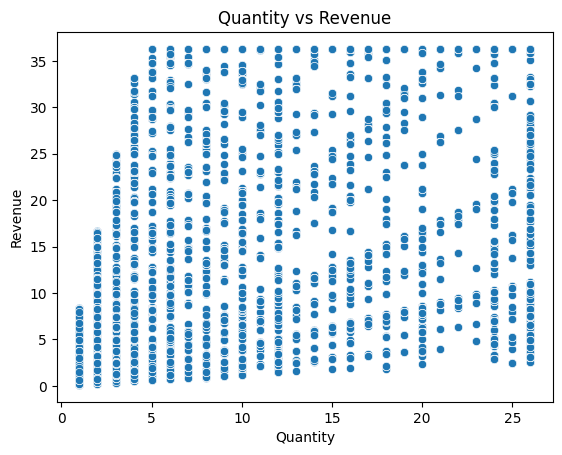

In [57]:
sns.scatterplot(x='Quantity', y='Revenue', data=df)
plt.title("Quantity vs Revenue")
plt.show()


## Relationship between UnitPrice and Revenue

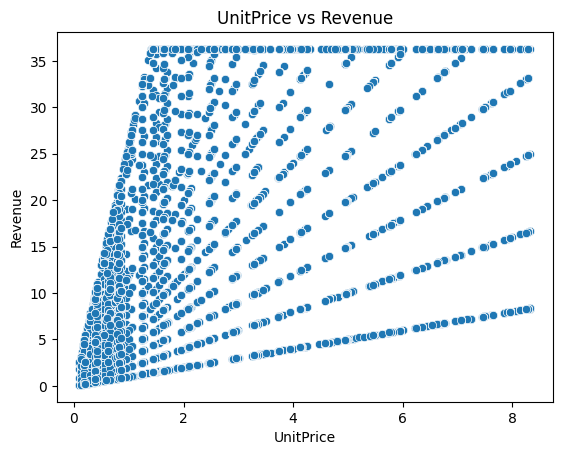

In [58]:
sns.scatterplot(x='UnitPrice', y='Revenue', data=df)
plt.title("UnitPrice vs Revenue")
plt.show()

##  Country vs Revenue

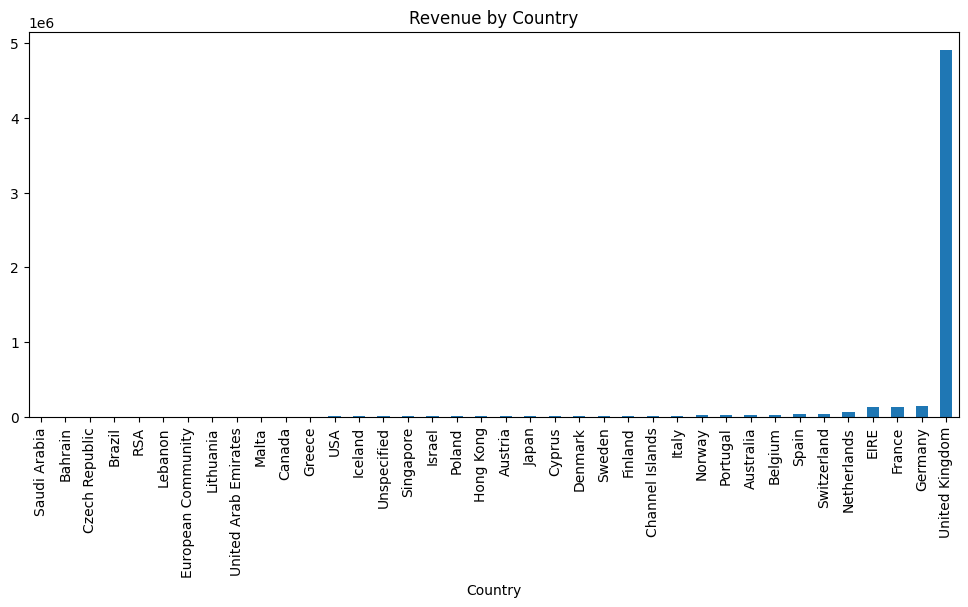

In [59]:
plt.figure(figsize=(12,5))
df.groupby('Country')['Revenue'].sum().sort_values().plot(kind='bar')
plt.title("Revenue by Country")
plt.show()

## Top Selling Products

Top Selling Products:
StockCode
85099B    21660
84879     20967
85123A    20751
21212     19828
22197     18535
20725     14045
22178     13204
84077     12386
84946     12351
23203     11992
Name: Quantity, dtype: int64


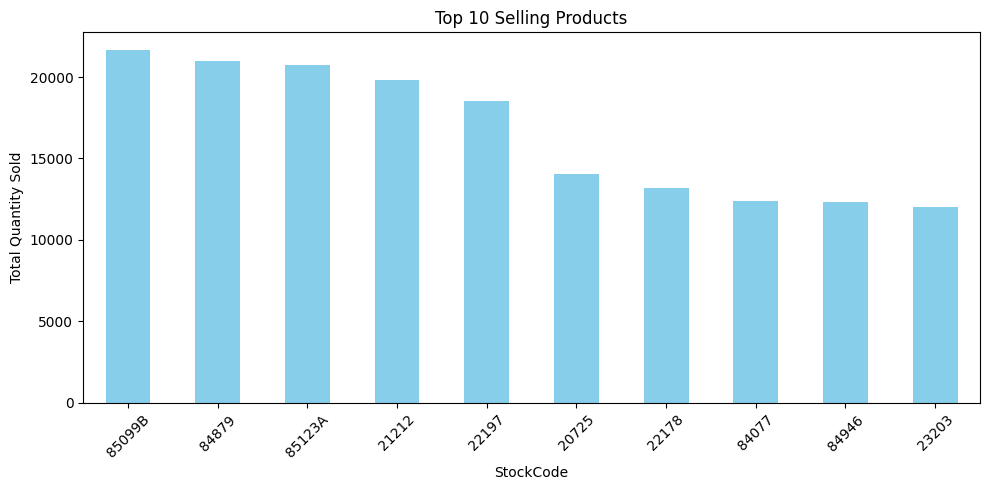

In [60]:
import matplotlib.pyplot as plt

top_products = (
    df.groupby("StockCode")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top Selling Products:")
print(top_products)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')

plt.title("Top 10 Selling Products")
plt.xlabel("StockCode")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Highest Revenue by Product

Top Revenue Products:
StockCode
85123A    45834.63
85099B    41234.79
47566     33638.77
84879     33326.05
22086     24780.32
22960     24114.06
20725     23740.99
23203     22952.57
23298     21738.07
22457     21572.24
Name: Revenue, dtype: float64


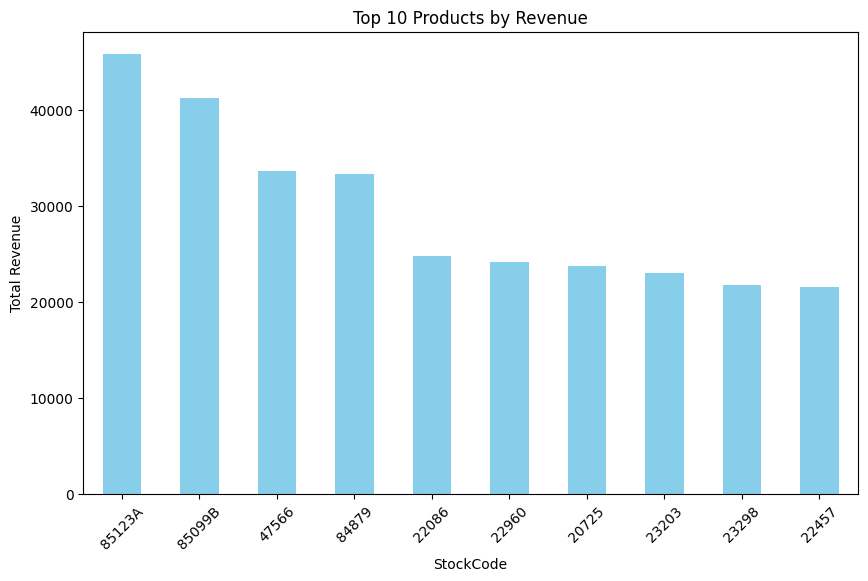

In [61]:
top_revenue_products = (
    df.groupby("StockCode")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print("Top Revenue Products:")
print(top_revenue_products)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_revenue_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("StockCode")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


# Customer Behavior

## Top Customers – Highest Revenue Clients

Most Active Customers:
CustomerID
-1.0        116881
 17841.0      7404
 14911.0      5111
 14096.0      4638
 12748.0      4247
 14606.0      2534
 15311.0      2302
 14646.0      1973
 13089.0      1726
 13263.0      1632
Name: count, dtype: int64
Top Revenue Customers:
CustomerID
-1.0        840266.86
 14911.0     92339.64
 14646.0     52674.56
 14096.0     38159.18
 13089.0     37801.04
 17841.0     33109.49
 14298.0     32413.20
 14156.0     27247.45
 15311.0     25062.54
 17511.0     24743.18
Name: Revenue, dtype: float64


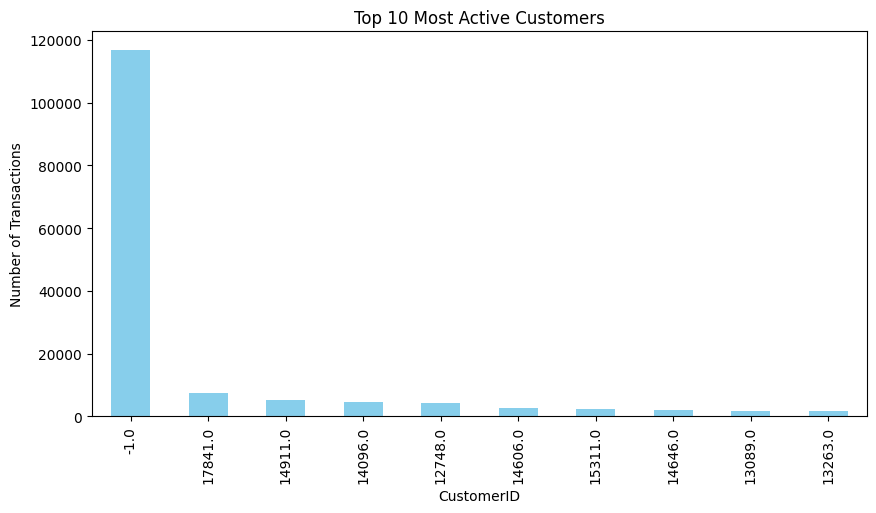

In [62]:
active_customers = df["CustomerID"].value_counts().head(10)
print("Most Active Customers:")
print(active_customers)

top_customers = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)
print("Top Revenue Customers:")
print(top_customers)

plt.figure(figsize=(10,5))
active_customers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Active Customers")
plt.xlabel("CustomerID")
plt.ylabel("Number of Transactions")
plt.show()


## Seasonal Patterns (Seasonality Analysis)

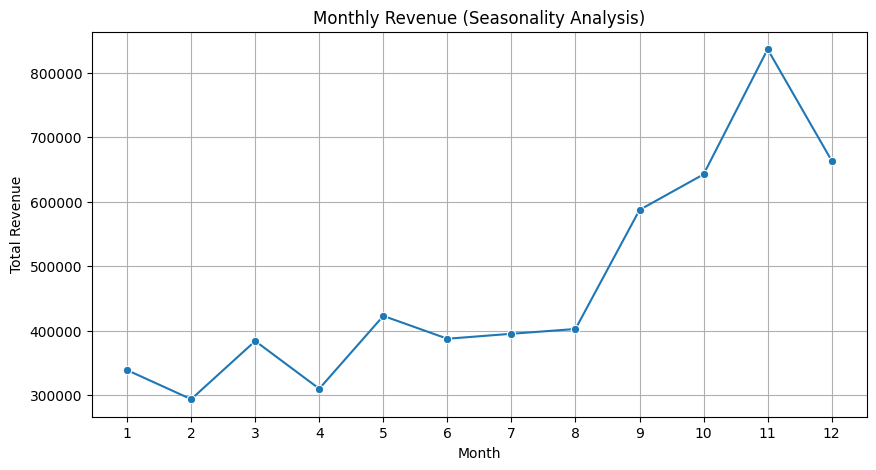

In [63]:

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["Month"] = df["InvoiceDate"].dt.month

monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Revenue (Seasonality Analysis)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


# Most Frequently Ordered Products (Frequency of Orders)"

Most Frequently Purchased Products:
StockCode
85123A    2253
85099B    2109
20725     1582
84879     1476
47566     1429
22197     1418
21212     1352
22383     1306
20727     1301
22457     1255
Name: count, dtype: int64


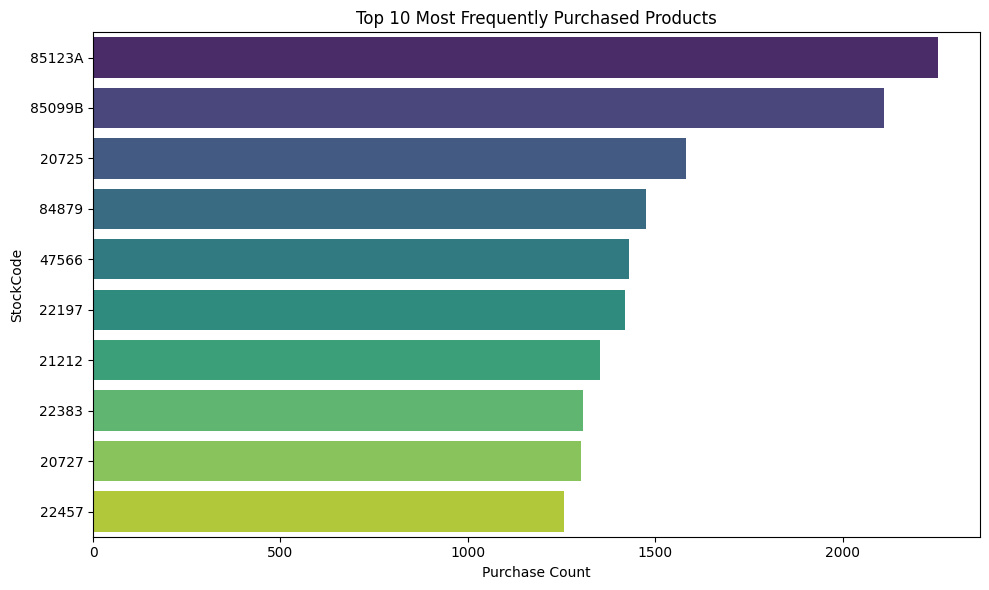

In [64]:
product_frequency = df["StockCode"].value_counts().head(10)
print("Most Frequently Purchased Products:")
print(product_frequency)

plt.figure(figsize=(10,6))
sns.barplot(x=product_frequency.values, y=product_frequency.index, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("StockCode")
plt.tight_layout()
plt.show()

## Seasonal / Time Analysis 

### Revenue by Day of Week

Top Days of Week:
 DayOfWeek
3    1174967.74
1    1060258.31
2    1024141.99
0     953405.75
4     893884.41
6     558538.22
Name: Revenue, dtype: float64


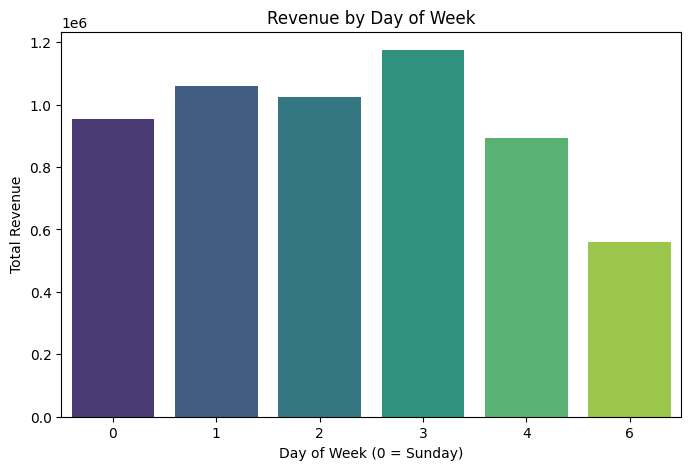

In [65]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek

daily_sales = df.groupby("DayOfWeek")["Revenue"].sum().sort_values(ascending=False)
print("Top Days of Week:\n", daily_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="viridis")
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week (0 = Sunday)")
plt.ylabel("Total Revenue")
plt.show()

# Products with High Return Rate

In [66]:
return_rate = (
    df.groupby("StockCode")["IsReturn"]
    .mean()
    .sort_values(ascending=False)
)
print("Products with Highest Return Rate:")
print(return_rate.head(10))

Products with Highest Return Rate:
StockCode
m         0.0
10002     0.0
10080     0.0
10120     0.0
90214P    0.0
90214O    0.0
90214N    0.0
90214M    0.0
90214L    0.0
90214K    0.0
Name: IsReturn, dtype: float64


In [67]:

returns_count = returns_df["StockCode"].value_counts()

total_count = df["StockCode"].value_counts()

return_rate = (returns_count / total_count).sort_values(ascending=False)

print("Products with Highest Return Rate:")
print(return_rate.head(10))


Products with Highest Return Rate:
StockCode
22423    61.0
37449    25.0
85066    25.0
22846    18.0
22424    17.0
21735    14.0
22768    12.5
22797    12.0
22168    11.0
22501    10.0
Name: count, dtype: float64


#  Products with Highest Average Basket Size

In [68]:
basket = (
    df.groupby("StockCode")
      .agg(avg_qty=("Quantity", "mean"), count=("Quantity", "count"))
      .query("count >= 10") 
      .sort_values("avg_qty", ascending=False)
)

basket.head(10)


,avg_qty,count
StockCode,,
17084R,26.000000,27
90058B,26.000000,15
22049,25.212121,33
16161G,25.181818,22
21495,25.133333,165
22046,25.093333,75
16156S,25.089820,167
23546,25.083333,120
16161U,25.082090,134


# Product Bundles 

Top Product Bundles:
                  Pair  Count
0  ('22386', '85099B')    825
1   ('22697', '22699')    767
2  ('21931', '85099B')    724
3  ('22411', '85099B')    680
4   ('20725', '22383')    655
5   ('20725', '20727')    641
6   ('22726', '22727')    632
7   ('22697', '22698')    632
8   ('20725', '22384')    606
9   ('22698', '22699')    598


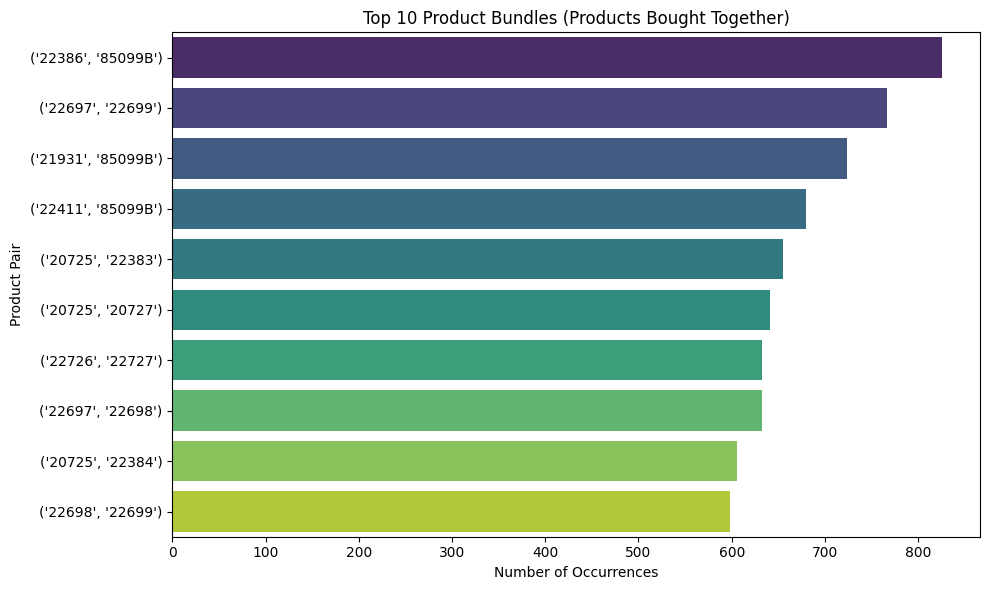

In [69]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Get bundles ----
pairs = []
for inv, data in df.groupby("InvoiceNo"):
    products = data["StockCode"].unique()
    for combo in combinations(products, 2):
        pairs.append(tuple(sorted(combo)))

bundle_counts = Counter(pairs).most_common(10)

# ---- Convert to DataFrame for plotting ----
bundle_df = pd.DataFrame(bundle_counts, columns=["Pair", "Count"])
bundle_df["Pair"] = bundle_df["Pair"].astype(str)

print("Top Product Bundles:")
print(bundle_df)

# ---- Visualization ----
plt.figure(figsize=(10,6))
sns.barplot(data=bundle_df, x="Count", y="Pair", palette="viridis")
plt.title("Top 10 Product Bundles (Products Bought Together)")
plt.xlabel("Number of Occurrences")
plt.ylabel("Product Pair")
plt.tight_layout()
plt.show()

##  Correlation Heatmap

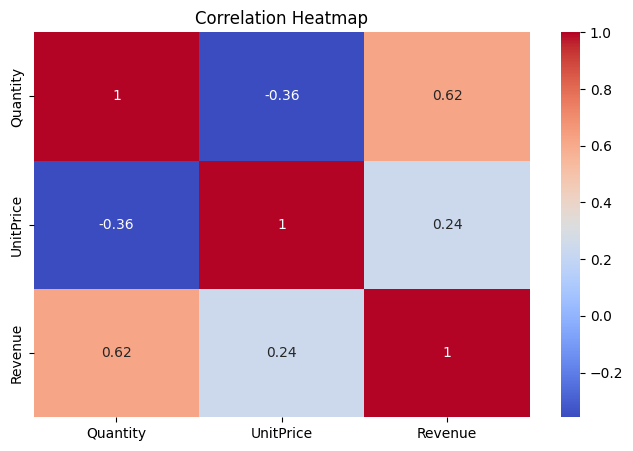

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Quantity','UnitPrice','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [71]:
df.shape

(486804, 12)

# 3) Feature Engineering & Feature Selection

# Add new features

In [72]:
df['CustomerTotalRevenue'] = df.groupby('CustomerID')['Revenue'].transform('sum')

In [73]:
df['CustomerTotalQty'] = df.groupby('CustomerID')['Quantity'].transform('sum')

In [74]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [75]:
df['RevenuePerItem'] = df['UnitPrice'] * df['Quantity']

In [76]:
df['IsHighPrice'] = df['UnitPrice'] > df['UnitPrice'].median()

In [77]:
df['ProductFrequency'] = df.groupby('StockCode')['StockCode'].transform('count')

In [78]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn,Month,DayOfWeek,CustomerTotalRevenue,CustomerTotalQty,Day,Hour,RevenuePerItem,IsHighPrice,ProductFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,12,2,4751.14,1716,1,8,15.30,True,2253
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,12,2,4751.14,1716,1,8,22.00,True,286
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,451
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,400


In [79]:
df.shape

(486804, 19)

In [80]:
df.to_csv("final_dataframe.csv", index=False)

In [81]:
column_list = df.columns.tolist()
print(column_list)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'IsReturn', 'Month', 'DayOfWeek', 'CustomerTotalRevenue', 'CustomerTotalQty', 'Day', 'Hour', 'RevenuePerItem', 'IsHighPrice', 'ProductFrequency']


# Feature Selection

## 1) Filter Methods — Correlation

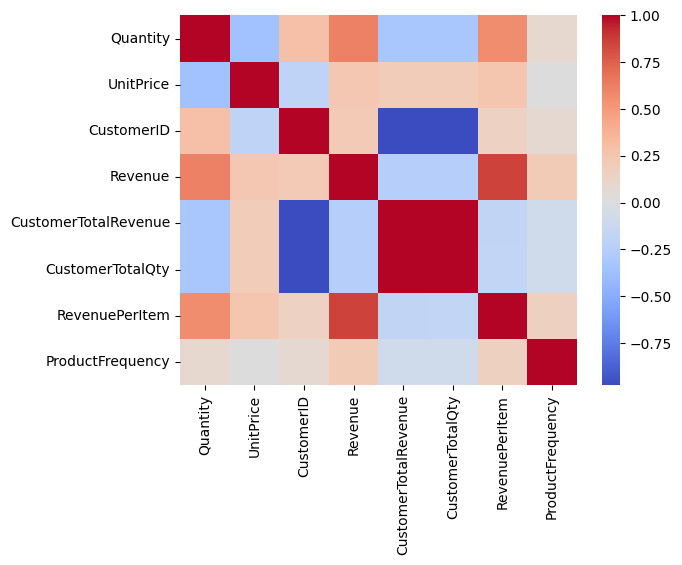

In [82]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

## Lasso

In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = numeric_df.drop("Revenue", axis=1)
y = numeric_df["Revenue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = Lasso(alpha=0.01)
model.fit(X_scaled, y)

print(model.coef_)

[ 3.37574072  2.27766364 -1.22975318 -1.93426452 -0.02662355  5.84425348
  0.76880265]


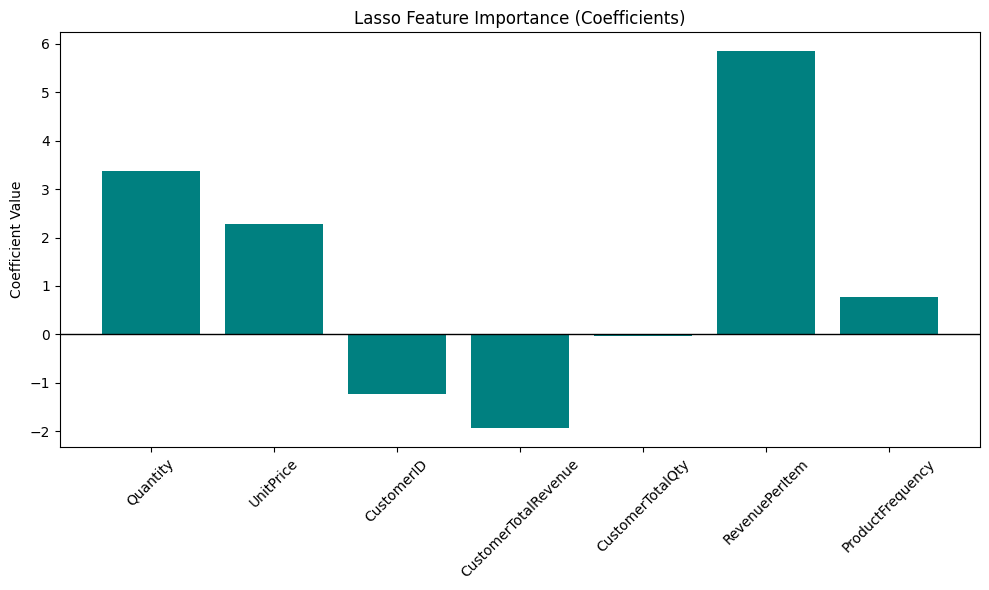

In [84]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = model.coef_


feature_names = X.columns

plt.figure(figsize=(10,6))
plt.bar(feature_names, coefficients, color='teal')
plt.axhline(0, color='black', linewidth=1)

plt.title("Lasso Feature Importance (Coefficients)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RFE

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Quantity', 'UnitPrice', 'CustomerID', 'CustomerTotalRevenue',
       'CustomerTotalQty', 'RevenuePerItem', 'ProductFrequency'],
      dtype='object')


# Fit Distributions

## Revenue Distribution

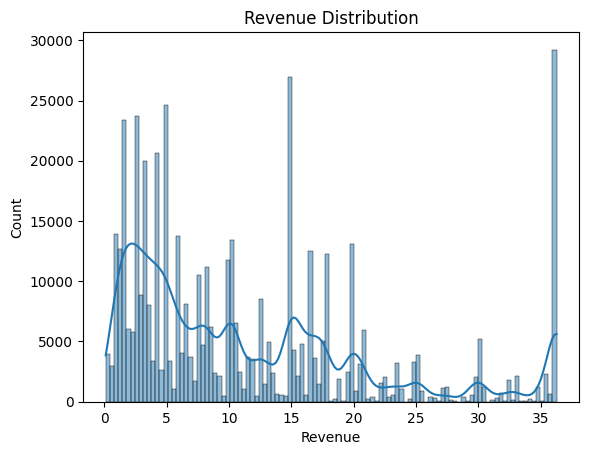

Shapiro Test p-value: 3.253042585489802e-54


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

sns.histplot(df["Revenue"], kde=True)
plt.title("Revenue Distribution")
plt.show()

stat, p = stats.shapiro(df["Revenue"].sample(5000)) 
print("Shapiro Test p-value:", p)


# 4) Probability Calculations

## Probability Revenue > 10

In [87]:
prob = (df["Revenue"] > 10).mean()
print("Probability Revenue > 10:", prob)

Probability Revenue > 10: 0.454632665302668


## Probability of UK Customers

In [88]:
prob_uk = (df["Country"] == "United Kingdom").mean()
print("Probability of UK Customers:", prob_uk)


Probability of UK Customers: 0.9160565648597793


## Probability of Return

In [89]:
prob_return = df["IsReturn"].mean()
print("Probability of Return:", prob_return)

Probability of Return: 0.0


## Probability Non-UK

In [90]:
prob_non_uk = (df['Country'] != "United Kingdom").mean()
print("Probability Non-UK:", prob_non_uk)


Probability Non-UK: 0.0839434351402207


## Probability Quantity > 5

In [91]:
prob_qty_gt5 = (df['Quantity'] > 5).mean()
print("Probability Quantity > 5:", prob_qty_gt5)


Probability Quantity > 5: 0.4307852852482724


# Hypothesis Testing

## Are Returns and Country Related? – Chi-Square Test between Country and Returns

In [92]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df["Country"], df["IsReturn"])
chi2, p, dof, exp = chi2_contingency(table)

print("Chi-Square p-value:", p)


Chi-Square p-value: 1.0


In [93]:
table = pd.crosstab(df["Country"], df["StockCode"])
chi2, p, dof, exp = chi2_contingency(table)
print("Chi-Square p-value:", p)


Chi-Square p-value: 0.0


In [94]:
table = pd.crosstab(df["IsReturn"], pd.qcut(df["ProductFrequency"], 4))
chi2, p, dof, exp = chi2_contingency(table)
print("Chi-Square p-value:", p)


Chi-Square p-value: 1.0


# 5) PCA 

Explained Variance Ratio: [0.43643365 0.25610961]


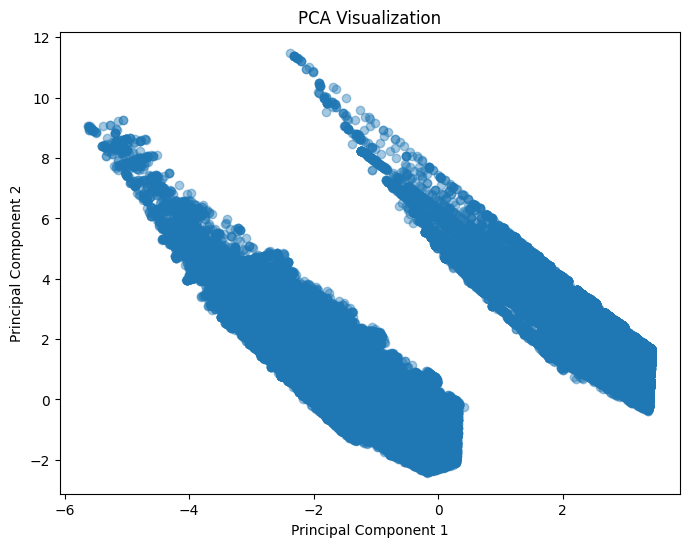

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1]
})

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.4)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

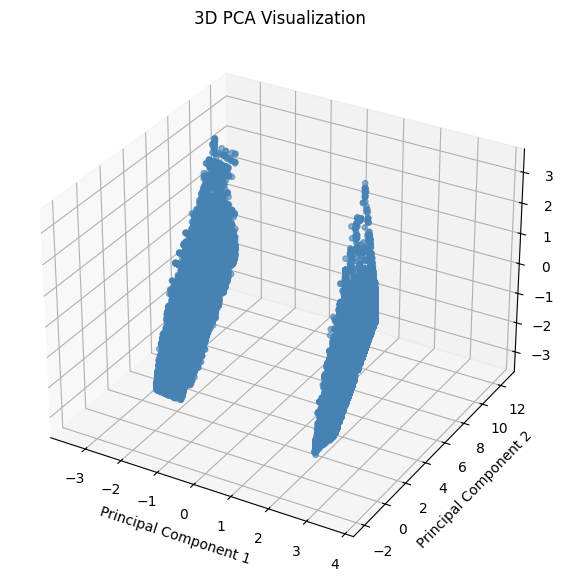

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]
pc3 = pca_result[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pc1, pc2, pc3, c='steelblue', s=15, alpha=0.6)

ax.set_title("3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


In [97]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=['PC1','PC2','PC3']
)

print(loadings)


     Quantity  UnitPrice  CustomerID  CustomerTotalRevenue  CustomerTotalQty  \
PC1 -0.290304   0.165603   -0.526893              0.535532          0.534892   
PC2  0.479305   0.259304   -0.169259              0.149282          0.151722   
PC3 -0.513092   0.792833    0.164949             -0.152632         -0.154846   

     RevenuePerItem  ProductFrequency  
PC1       -0.176922         -0.080482  
PC2        0.732288          0.304678  
PC3        0.089847          0.159995  


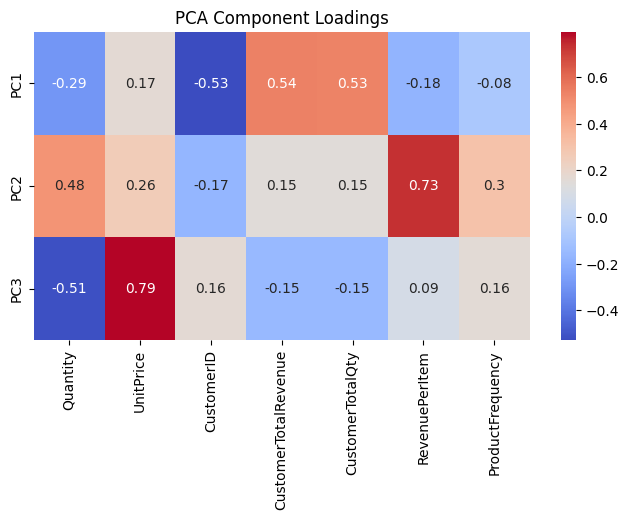

In [98]:
plt.figure(figsize=(8,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("PCA Component Loadings")
plt.show()


## 6)Clustering

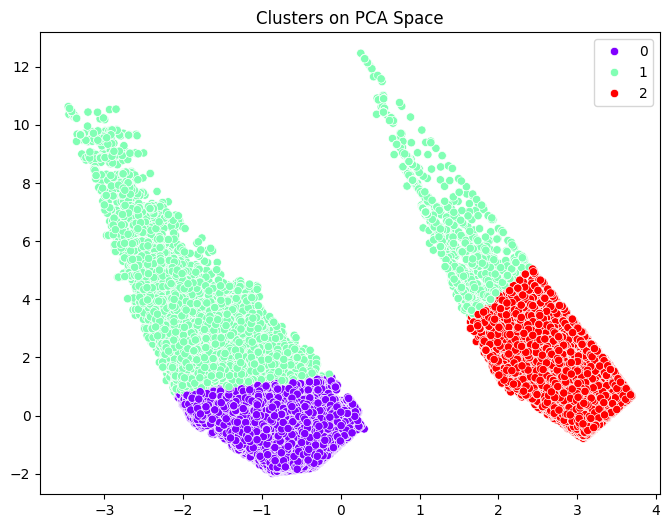

In [99]:
from sklearn.cluster import KMeans
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :2]) 

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="rainbow")
plt.title("Clusters on PCA Space")
plt.show()


In [100]:
df["Cluster"] = clusters

In [101]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,IsReturn,Month,DayOfWeek,CustomerTotalRevenue,CustomerTotalQty,Day,Hour,RevenuePerItem,IsHighPrice,ProductFrequency,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,12,2,4751.14,1716,1,8,15.30,True,2253,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,329,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,12,2,4751.14,1716,1,8,22.00,True,286,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,451,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,12,2,4751.14,1716,1,8,20.34,True,400,0


In [102]:
df.groupby("Cluster").mean(numeric_only=True)


,Quantity,UnitPrice,CustomerID,Revenue,IsReturn,Month,DayOfWeek,CustomerTotalRevenue,CustomerTotalQty,Day,Hour,RevenuePerItem,IsHighPrice,ProductFrequency
Cluster,,,,,,,,,,,,,,
0,7.029890,2.272364,15338.424209,10.381781,0.0,7.648277,2.643118,5813.665885,3751.156911,15.068139,12.792778,10.382966,0.428817,395.927973
1,20.516023,2.733725,14476.631513,32.467798,0.0,7.510374,2.358370,39300.999910,18538.010267,14.855320,12.283152,47.968647,0.527965,682.774131
2,2.572997,3.205805,-1.000000,6.761844,0.0,7.341361,1.900659,840266.860000,334840.000000,14.966117,14.166387,6.970439,0.666010,350.995503


In [103]:
df.groupby("Cluster")["Country"].value_counts()

Cluster  Country       
0        United Kingdom    293833
         Germany             6896
         France              6468
         EIRE                5213
         Spain               1987
                            ...  
2        Unspecified          198
         Switzerland          116
         France                64
         Israel                45
         Portugal              39
Name: count, Length: 82, dtype: int64

In [104]:
df.groupby("Cluster")["StockCode"].value_counts()

Cluster  StockCode
0        20725        1071
         20727         939
         22383         920
         22720         910
         21034         893
                      ... 
2        90183c          1
         90187A          1
         90210B          1
         90212C          1
         m               1
Name: count, Length: 8426, dtype: int64

In [105]:
for c in df["Cluster"].unique():
    print(f"\n--- Top 10 StockCodes in Cluster {c} ---")
    print(df[df["Cluster"] == c]["StockCode"].value_counts().head(10))


--- Top 10 StockCodes in Cluster 1 ---
StockCode
85123A    1438
85099B    1248
84879      741
21212      716
47566      609
22197      464
23084      446
22086      436
23298      397
21977      393
Name: count, dtype: int64

--- Top 10 StockCodes in Cluster 0 ---
StockCode
20725    1071
20727     939
22383     920
22720     910
21034     893
22382     890
23203     856
20728     850
23209     841
22469     826
Name: count, dtype: int64

--- Top 10 StockCodes in Cluster 2 ---
StockCode
85099B    460
21931     386
22411     359
20712     358
22386     340
22379     337
21935     326
21731     323
22697     319
22197     308
Name: count, dtype: int64
